In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import plotly.express as px

from scipy import stats

import seaborn as sns
from matplotlib.font_manager import FontProperties


plt.rcParams['font.family']=['Times New Roman']
plt.rcParams['savefig.dpi'] = 600

In [2]:
file_address = '../Data/Merged_data/Ageout_tdap.csv'

df_age_tdap = pd.read_csv(file_address)


file_address = '../Data/Merged_data/Ageout_hpv.csv'

df_age_hpv = pd.read_csv(file_address)


file_address = '../Data/Merged_data/Ageout_total.csv'

df_age_total = pd.read_csv(file_address)


file_address = '../Data/longislandzip.csv'

df_zipcode = pd.read_csv(file_address)

In [3]:
# Read Hpv data
file_address = '../Data/Merged_data/NassauCountyHPV.xlsx'

df_hpv_nassau = pd.read_excel(file_address)

file_address = '../Data/Merged_data/SuffolkCountyHPV.xlsx'

df_hpv_suffolk = pd.read_excel(file_address)

# Read TDAP data
file_address = '../Data/Merged_data/NassauCountyTDAP.xlsx'

df_tdap_nassau = pd.read_excel(file_address)

file_address = '../Data/Merged_data/SuffolkCountyTDAP.xlsx'

df_tdap_suffolk = pd.read_excel(file_address)

In [4]:
df_hpv = pd.concat([df_hpv_suffolk,df_hpv_nassau])

In [5]:
#Read the Cleaned hpv patients Data:
file_address = '../Data/Merged_data/distinct_hpv_patients.csv'

hpv_patients = pd.read_csv(file_address)

file_address = '../Data/race_hpv.csv'
hpv_race = pd.read_csv(file_address)

# file_address = '../Data/total_population.csv'
# total_poplt_race = pd.read_csv(file_address)


In [6]:
def calamount(df,years,start,end):
    rate = []
    for year in years:
        lst = list(df[year])
        count = 0
        for i in range(len(lst)):
            if lst[i]:
                if lst[i]<=end and lst[i]>=start:
                    count += 1
#     print(count)
        rate.append(count)
    return np.array(rate)[4:]

In [7]:
#Calculate each populations:
years = np.array((df_age_total.columns))[6:]
hpv_amount = calamount(df_age_hpv,years,9,13)
total_amount = calamount(df_age_total,years,9,13)
tdap_amount = calamount(df_age_tdap,years,9,13)


#Calculate each rate
hpv_Rate = hpv_amount/total_amount
tdap_Rate = tdap_amount/total_amount

# We only keep the rate and amount from 2012 to 2021
# hpv_amount = hpv_amount[4:]
# hpv_Rate = hpv_Rate[4:]
# tdap_amount = tdap_amount[4:]
# tdap_Rate = tdap_Rate[4:]
# total_amount = total_amount[4:]
# years = years[4:]

In [8]:
#calculate gender based populations:
df_age_hpv_m = df_age_hpv[df_age_hpv['GENDER']=='M']
df_age_hpv_f = df_age_hpv[df_age_hpv['GENDER']=='F']

df_age_total_m = df_age_total[df_age_total['GENDER']=='M']
df_age_total_f = df_age_total[df_age_total['GENDER']=='F']

hpv_amount_m = calamount(df_age_hpv_m,years,9,13)
hpv_amount_f = calamount(df_age_hpv_f,years,9,13)

total_amount_m = calamount(df_age_total_m,years,9,13)
total_amount_f = calamount(df_age_total_f,years,9,13)

hpv_Rate_m = hpv_amount_m/total_amount_m
hpv_Rate_f = hpv_amount_f/total_amount_f

In [9]:
years = years[4:]

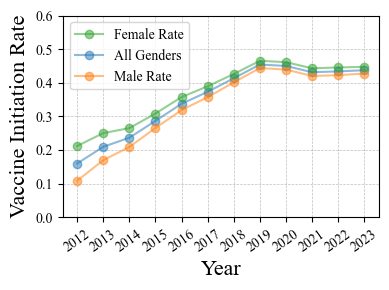

In [10]:
# Show hpv rate change
plt.figure(figsize=(4, 3))

# plt.bar(years, hpv_Rate,color = 'blue',alpha=0.5,width=0.6)
l1, = plt.plot(years, hpv_Rate,'o-',color = 'C0',alpha=0.5,label='All Genders')
l2, = plt.plot(years, hpv_Rate_m,'o-',color = 'C1',alpha=0.5,label = 'Male Rate')
l3, = plt.plot(years, hpv_Rate_f,'o-',color = 'C2',alpha=0.5,label = 'Female Rate')
# plt.plot(years, hpv_Rate,'*-', color='red', label='rate')'


font = FontProperties(size=16)

plt.ylim([0,0.6])
plt.xlabel('Year',fontproperties=font)
plt.ylabel('Vaccine Initiation Rate',fontproperties=font)
# plt.title('HPV Vaccination Rate Yearly Change (Age 9-13)')
plt.xticks(years,rotation = 35)
plt.legend(handles = [l3,l1,l2])
plt.tight_layout()
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.savefig('Figures/B/rate_total.jpg')


plt.show()

In [11]:
years = np.array((df_age_total.columns))[6:]
# suffolk
df_suffolk_hpv = df_age_hpv[df_age_hpv['PatientCounty']=='Suffolk']
df_suffolk_total = df_age_total[df_age_total['PatientCounty']=='Suffolk']
df_suffolk_tdap = df_age_tdap[df_age_tdap['PatientCounty']=='Suffolk']

hpv_amount = calamount(df_suffolk_hpv,years,9,13)
total_amount = calamount(df_suffolk_total,years,9,13)
tdap_amount = calamount(df_suffolk_tdap,years,9,13)

hpv_Rate_s = hpv_amount/total_amount
tdap_Rate_s = tdap_amount/total_amount

In [12]:
#suffolk Male/ Female
df_suffolk_hpv_m = df_suffolk_hpv[df_suffolk_hpv['GENDER']=='M']
df_suffolk_total_m = df_suffolk_total[df_suffolk_total['GENDER']=='M']
df_suffolk_hpv_f = df_suffolk_hpv[df_suffolk_hpv['GENDER']=='F']
df_suffolk_total_f = df_suffolk_total[df_suffolk_total['GENDER']=='F']

hpv_amount_m = calamount(df_suffolk_hpv_m,years,9,13)
total_amount_m = calamount(df_suffolk_total_m,years,9,13)

hpv_amount_f = calamount(df_suffolk_hpv_f,years,9,13)
total_amount_f = calamount(df_suffolk_total_f,years,9,13)

hpv_Rate_sm = hpv_amount_m/total_amount_m
hpv_Rate_sf = hpv_amount_f/total_amount_f


In [13]:
#nassau

df_nassau_hpv = df_age_hpv[df_age_hpv['PatientCounty']=='Nassau']
df_nassau_total = df_age_total[df_age_total['PatientCounty']=='Nassau']
df_nassau_tdap = df_age_tdap[df_age_tdap['PatientCounty']=='Nassau']

hpv_amount = calamount(df_nassau_hpv,years,9,13)
total_amount = calamount(df_nassau_total,years,9,13)
tdap_amount = calamount(df_nassau_tdap,years,9,13)

hpv_Rate_n = hpv_amount/total_amount
tdap_Rate_n = tdap_amount/total_amount

# years = years[4:]

In [14]:
#Nassau Male/ Female
df_nassau_hpv_m = df_nassau_hpv[df_nassau_hpv['GENDER']=='M']
df_nassau_total_m = df_nassau_total[df_nassau_total['GENDER']=='M']
df_nassau_hpv_f = df_nassau_hpv[df_nassau_hpv['GENDER']=='F']
df_nassau_total_f = df_nassau_total[df_nassau_total['GENDER']=='F']

hpv_amount_m = calamount(df_nassau_hpv_m,years,9,13)
total_amount_m = calamount(df_nassau_total_m,years,9,13)

hpv_amount_f = calamount(df_nassau_hpv_f,years,9,13)
total_amount_f = calamount(df_nassau_total_f,years,9,13)

hpv_Rate_nm = hpv_amount_m/total_amount_m
hpv_Rate_nf = hpv_amount_f/total_amount_f


In [15]:
years = years[4:]

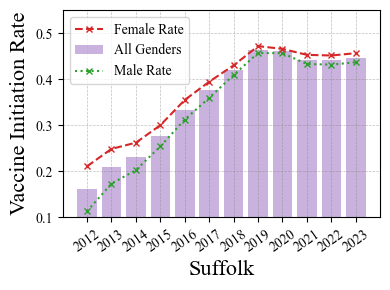

In [16]:
# Show hpv rate change
plt.figure(figsize=(4, 3))

# plt.bar(years, hpv_Rate,color = 'blue',alpha=0.5,width=0.6)
# plt.plot(years, hpv_Rate_s,'o-',color = 'C1',alpha=0.5,label='Suffolk Rate')
l1 = plt.bar(years, hpv_Rate_s,color = 'C4',alpha=0.5,label="All Genders")
l2, = plt.plot(years, hpv_Rate_sm,'x:',ms='4',color = 'C2',label='Male Rate')
l3, = plt.plot(years, hpv_Rate_sf,'x--',ms='4',color = 'C3',label='Female Rate')
# plt.plot(years, hpv_Rate_sf,'o:',color = 'C1',alpha=0.5,label='Suffolk Female')
# plt.plot(years, hpv_Rate_n,'o-',color = 'C2',alpha=0.5,label = 'Nassau Rate')
# plt.bar(years, hpv_Rate_n,color = 'C2',alpha=0.5,label = 'Nassau Rate')
font = FontProperties(size=16)

plt.ylim([0.1,0.55])
plt.xlabel('Suffolk',fontproperties=font)
plt.ylabel('Vaccine Initiation Rate',fontproperties=font)

# plt.title('HPV Vaccination Rate Yearly Change (Age 9-13)')
plt.xticks(years,rotation = 35)
plt.legend(handles = [l3,l1,l2])
plt.tight_layout()
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.savefig('Figures/B/rate_Suffolk.jpg')


plt.show()

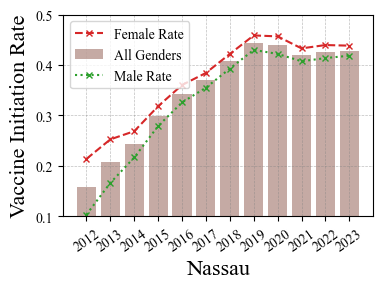

In [17]:
# Show hpv rate change
plt.figure(figsize=(4, 3))

# plt.bar(years, hpv_Rate,color = 'blue',alpha=0.5,width=0.6)
# plt.plot(years, hpv_Rate_s,'o-',color = 'C1',alpha=0.5,label='Suffolk Rate')
l1 = plt.bar(years, hpv_Rate_n,color = 'C5',alpha=0.5,label='All Genders')
l2, = plt.plot(years, hpv_Rate_nm,'x:',ms='4',color = 'C2',label='Male Rate')
l3, = plt.plot(years, hpv_Rate_nf,'x--',ms='4',color = 'C3',label='Female Rate')
# plt.plot(years, hpv_Rate_sf,'o:',color = 'C1',alpha=0.5,label='Suffolk Female')
# plt.plot(years, hpv_Rate_n,'o-',color = 'C2',alpha=0.5,label = 'Nassau Rate')
# plt.bar(years, hpv_Rate_n,color = 'C2',alpha=0.5,label = 'Nassau Rate')
font = FontProperties(size=16)

plt.ylim([0.1,0.5])
plt.xlabel('Nassau',fontproperties=font)
plt.ylabel('Vaccine Initiation Rate',fontproperties=font)

# plt.title('HPV Vaccination Rate Yearly Change (Age 9-13)')
plt.xticks(years,rotation = 35)
plt.legend(handles = [l3,l1,l2])
plt.tight_layout()
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.savefig('Figures/B/rate_Nassau.jpg')


plt.show()

In [31]:
def mergeRacetoOthers(dose):
    dose[4] = dose[4]+dose[0]+dose[3]
    res = list(dose[1:3])
    res=res+list(dose[4:])
    return res

In [32]:
group_race = hpv_patients[hpv_patients['PatientAge']<15].groupby(['RACE_DESC','Doses']).size().reset_index(name='count')
dose1 = np.array(group_race[group_race['Doses']==1]['count'])
dose2 = np.array(group_race[group_race['Doses']==2]['count'])
dose3 = np.array(group_race[group_race['Doses']==3]['count'])
races = np.array(group_race['RACE_DESC'].unique())
res = list(races[1:3])+list(races[4:])
races = res

dose1 = mergeRacetoOthers(dose1)
dose2 = mergeRacetoOthers(dose2)
dose3 = mergeRacetoOthers(dose3)

In [33]:
print(dose1)
print(dose2)
print(dose3)

[213, 4466, 6764, 112, 10971, 8856, 24808]
[1499, 16803, 21732, 799, 42733, 22072, 101292]
[415, 5029, 5189, 11264, 7175, 30460]


In [34]:
races = np.array(hpv_race['race'])

def calamountfull(df,years,start,end):
    rate = []
    for year in years:
        lst = list(df[year])
        count = 0
        for i in range(len(lst)):
            if lst[i]:
                if lst[i]<=end and lst[i]>=start:
                    count += 1
#     print(count)
        rate.append(count)
    return np.array(rate)

def RaceCalAmount(df,years,races,start,end):
    race_val = {}
    for race in races:
        tmp_df = df[df['RACE_DESC']==race]
        amount = calamountfull(tmp_df,years,start,end)
        race_val[race] = np.array(amount)
    return race_val

hpv_amount = RaceCalAmount(df_age_hpv,years,races,9,13)
total_amount = RaceCalAmount(df_age_total,years,races,9,13)

hpv_amount['OTHER'] = hpv_amount['OTHER']+hpv_amount['AMERICAN INDIAN OR ALASKA NATIVE']+hpv_amount['NATIVE HAWAIIAN OR OTHER PACIFIC']
total_amount['OTHER'] = total_amount['OTHER']+total_amount['AMERICAN INDIAN OR ALASKA NATIVE']+hpv_amount['NATIVE HAWAIIAN OR OTHER PACIFIC']

rate = {}
for race in races[:5]:
    rate[race]=hpv_amount[race]/total_amount[race]
rate

{'BLACK OR AFRICAN-AMERICAN': array([0.20758043, 0.26224521, 0.30025208, 0.37348018, 0.43763358,
        0.45901639, 0.49676885, 0.54142036, 0.53464314, 0.52086677,
        0.53120089, 0.53060277]),
 'WHITE': array([0.12442088, 0.17260953, 0.19329124, 0.23537515, 0.28587945,
        0.32364876, 0.36657542, 0.40983328, 0.40863507, 0.38484342,
        0.38202036, 0.38443257]),
 'UNKNOWN': array([0.17437406, 0.21813441, 0.24622932, 0.28972163, 0.33069452,
        0.36000248, 0.38397319, 0.40843306, 0.38655742, 0.36008188,
        0.35154689, 0.3562609 ]),
 'OTHER': array([0.23304016, 0.2867952 , 0.33075104, 0.38687125, 0.42924469,
        0.46340115, 0.50289017, 0.54140744, 0.53623896, 0.52271089,
        0.53399642, 0.54014945]),
 'ASIAN': array([0.19780776, 0.25330168, 0.27211848, 0.33584185, 0.38809399,
        0.41405384, 0.44943931, 0.48854353, 0.49153908, 0.48774638,
        0.49322189, 0.50067024])}

In [35]:
Race_rate = {}
Race_rate['BLACK']=rate['BLACK OR AFRICAN-AMERICAN']
Race_rate['WHITE']=rate['WHITE']
Race_rate['ASIAN']=rate['ASIAN']

In [36]:
def ethicCalAmount(df,years,ethics,start,end):
    ethics_val = {}
    for ethic in ethics:
        tmp_df = df[df['ETHNICITY_DESC']==ethic]
        amount = calamountfull(tmp_df,years,start,end)
        ethics_val[ethic] = np.array(amount)
    return ethics_val


In [37]:
ethics = np.array(hpv_patients['ETHNICITY_DESC'].unique())
hpv_amount = ethicCalAmount(df_age_hpv,years,ethics,9,13)
total_amount = ethicCalAmount(df_age_total,years,ethics,9,13)

In [38]:
rate = {}
for ethic in ethics[:5]:
    rate[ethic]=hpv_amount[ethic]/total_amount[ethic]


In [39]:
ethic_rate={}
ethic_rate['HISPANIC'] = rate['HISPANIC OR LATINO']
ethic_rate['NON-HISPANIC']=rate['NOT HISPANIC OR LATINO']

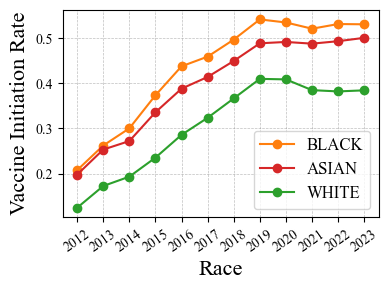

In [40]:
plt.figure(figsize=(4, 3))
# blue_pink_plate = ['#4e8bc4','#96cbfc','#c2e1fc','#ffc2d9','#ff99be']
colors = ['C1','C2','C3','C4','C5']
i=0
lines = []
for k,v in Race_rate.items():
    
    l, = plt.plot(years,v,'o-',color=colors[i],label = k )
    i+=1
    lines.append(l)


font = FontProperties(size=16)

# plt.ylim([0.1,0.5])
plt.xlabel('Race',fontproperties=font)
plt.ylabel('Vaccine Initiation Rate',fontproperties=font)

# plt.title('HPV Vaccination Rate Changed by Races (Age 9-13)')

plt.xticks(years,rotation = 35)
plt.legend(loc='best',prop={'size':12},handles = [lines[0],lines[2],lines[1]])

plt.tight_layout()
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.savefig('Figures/B/rate_Race.jpg')

plt.show()

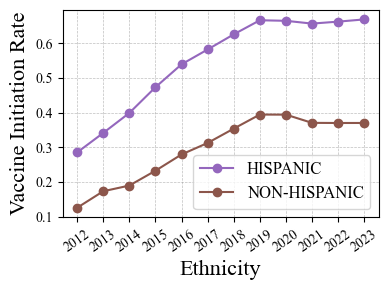

In [41]:
Race_rate = ethic_rate
plt.figure(figsize=(4, 3))
# blue_pink_plate = ['#4e8bc4','#96cbfc','#c2e1fc','#ffc2d9','#ff99be']
colors = ['C4','C5']
i=0
lines = []
for k,v in Race_rate.items():
    
    l, = plt.plot(years,v,'o-',color=colors[i],label = k )
    i+=1
    lines.append(l)


font = FontProperties(size=16)

# plt.ylim([0.1,0.5])
plt.xlabel('Ethnicity',fontproperties=font)
plt.ylabel('Vaccine Initiation Rate',fontproperties=font)

# plt.title('HPV Vaccination Rate Changed by Races (Age 9-13)')

plt.xticks(years,rotation = 35)
plt.legend(loc='best',prop={'size':12},handles = [lines[0],lines[1]])

plt.tight_layout()
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.savefig('Figures/B/rate_ethic.jpg')

plt.show()